<a href="https://colab.research.google.com/github/IgorNascAlves/scrapping_forum/blob/main/analise_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
url = "https://raw.githubusercontent.com/IgorNascAlves/scrapping_forum/main/subcategoria_topicos_sem_resposta.csv"

In [20]:
df = pd.read_csv(url)
df.head()

,URL,Nome,Quantidade
0,https://cursos.alura.com.br/forum/subcategoria...,Multiplataforma,22
1,https://cursos.alura.com.br/forum/subcategoria...,Flutter,1
2,https://cursos.alura.com.br/forum/subcategoria...,Android,4
3,https://cursos.alura.com.br/forum/subcategoria...,iOS,9
4,https://cursos.alura.com.br/forum/subcategoria...,Jogos,3


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   URL         112 non-null    object
 1   Nome        112 non-null    object
 2   Quantidade  112 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ KB


Quantidade de subcategorias

In [22]:
df.shape

(112, 3)

In [23]:
qtd_subcategorias = len(df.Nome.unique())
qtd_subcategorias

112

In [24]:
df.Quantidade.value_counts()

100    7
11     7
16     5
1      5
2      5
4      5
9      5
15     5
0      5
8      4
12     3
17     3
35     3
28     2
18     2
19     2
21     2
22     2
26     2
13     2
25     2
29     2
31     2
32     2
33     2
3      2
37     2
5      2
84     1
6      1
82     1
88     1
93     1
10     1
70     1
43     1
14     1
60     1
49     1
40     1
24     1
95     1
27     1
30     1
34     1
36     1
39     1
20     1
Name: Quantidade, dtype: int64

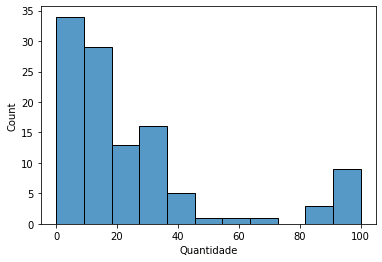

In [25]:
sns.histplot(x='Quantidade', data=df)

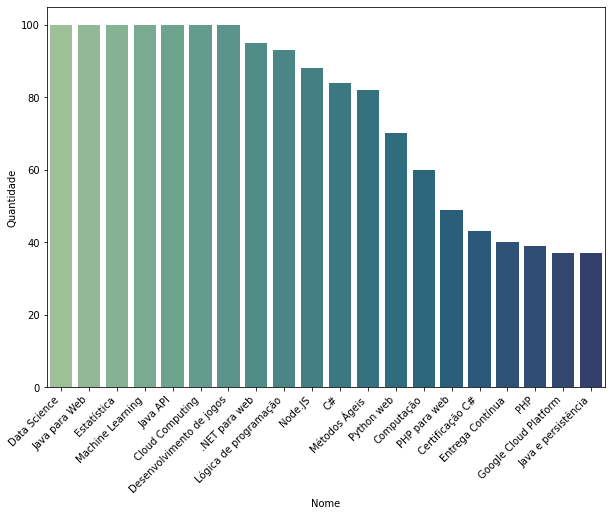

In [26]:
plt.figure(figsize=(10,7))
ax = sns.barplot(x="Nome", y="Quantidade", data=df.sort_values("Quantidade", ascending=False).head(20), palette='crest')
_ = plt.xticks(rotation=45, ha='right') 

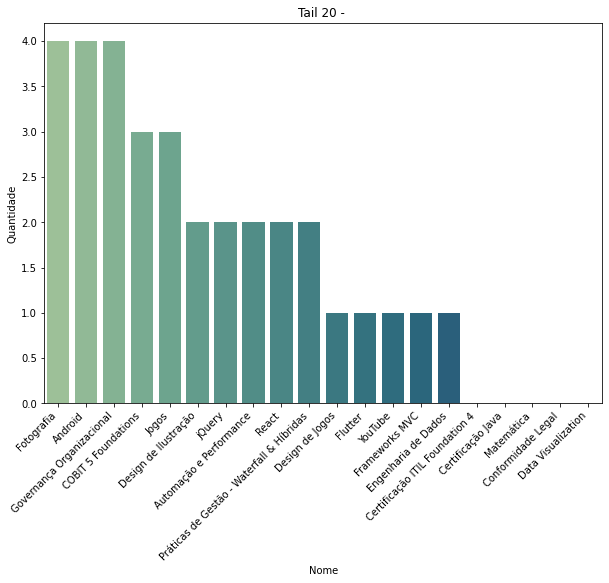

In [27]:
plt.figure(figsize=(10,7))
ax = sns.barplot(x="Nome", y="Quantidade", data=df.sort_values("Quantidade", ascending=False).tail(20), palette='crest')
ax.set_title('Tail 20 - ')
_ = plt.xticks(rotation=45, ha='right') 

Quantidade de subcategorias com mais de uma pagina

In [28]:
df.query('Quantidade > 20')['Quantidade'].count()

46

In [29]:
df["Mais_uma_pag"] = [True if row > 20 else False for row in df['Quantidade']]

In [32]:
df.value_counts("Mais_uma_pag")

Mais_uma_pag
False    66
True     46
dtype: int64

In [30]:
df.value_counts("Mais_uma_pag", normalize=True)*100

Mais_uma_pag
False    58.928571
True     41.071429
dtype: float64

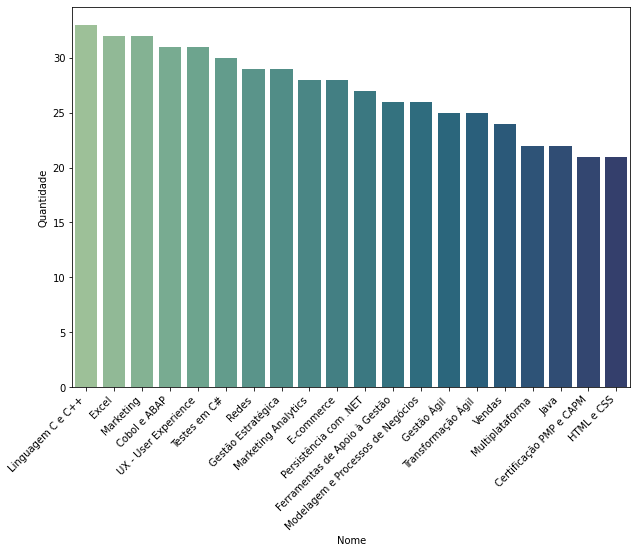

In [31]:
plt.figure(figsize=(10,7))
ax = sns.barplot(x="Nome", y="Quantidade", data=df.query("Mais_uma_pag == True").sort_values("Quantidade", ascending=False).tail(20), palette='crest')
_ = plt.xticks(rotation=45, ha='right') 